<a href="https://colab.research.google.com/github/saniyabhosale/PRODIGY_DS_03/blob/main/PRODIGY_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Initial Data Info ---
First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Information about the dataset:
<class 'pandas.core.fram

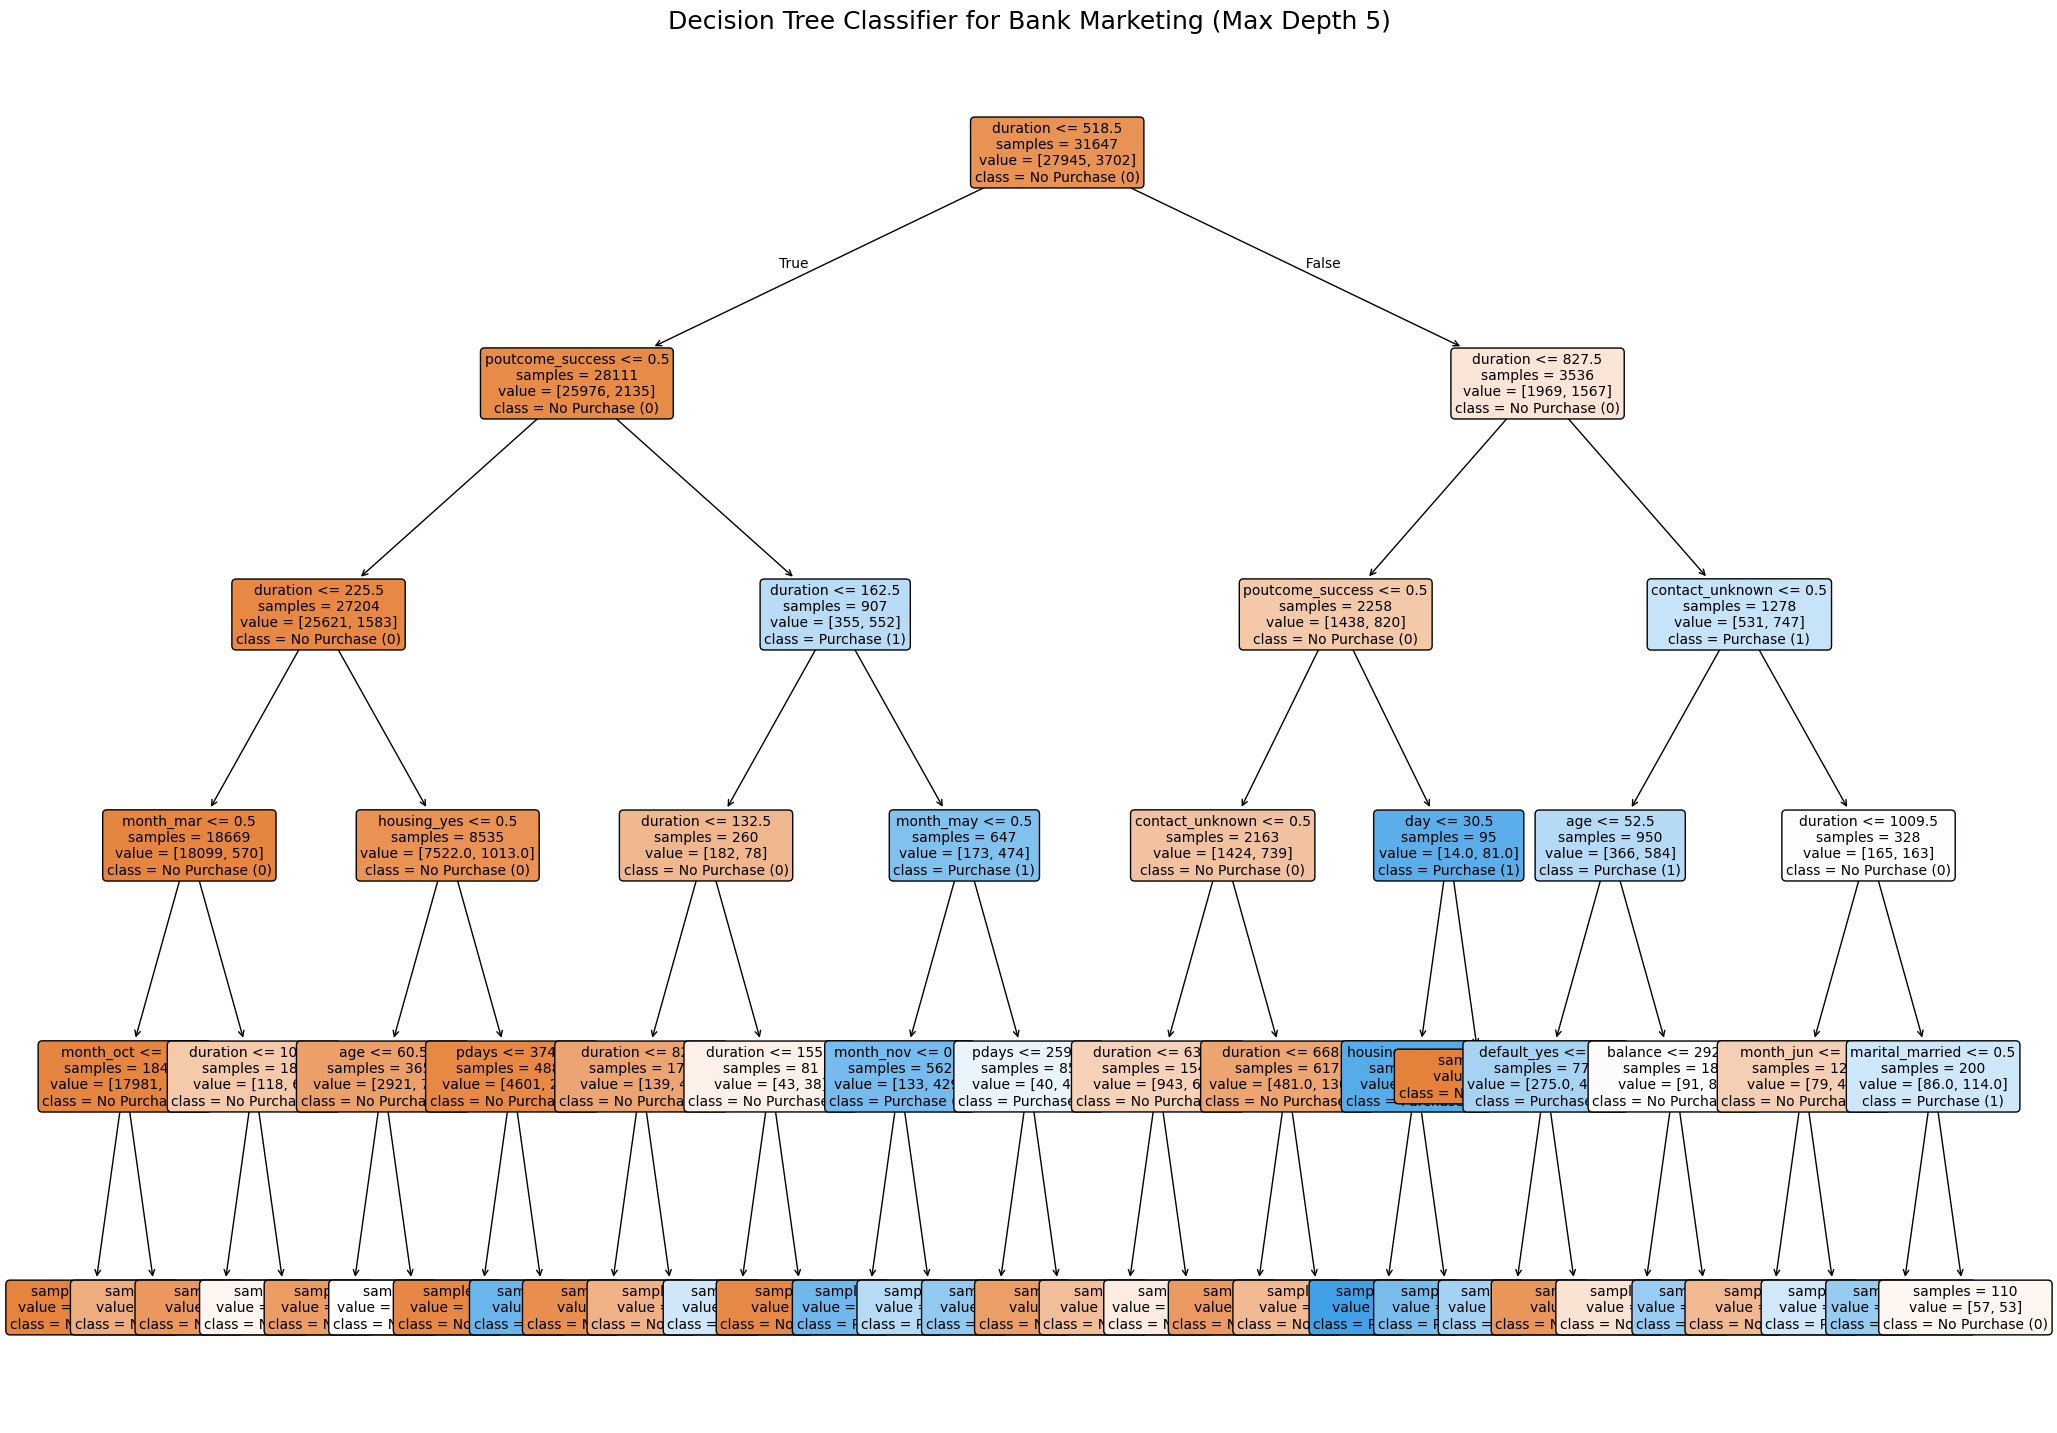


Decision Tree visualization saved as 'decision_tree_classifier.png' and displayed.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# The user uploaded 'bank-full.csv' and specified ';' as the delimiter.
df = pd.read_csv('bank-full.csv', sep=';')

print("--- Initial Data Info ---")
print("First 5 rows of the dataset:")
print(df.head())
print("\nInformation about the dataset:")
print(df.info())
print("\nMissing values before preprocessing:")
print(df.isnull().sum())

# --- Data Preprocessing ---

# Convert target variable 'y' to numerical (yes=1, no=0)
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Identify categorical columns (excluding the target 'y' which is now numerical)
categorical_cols = df.select_dtypes(include='object').columns

print(f"\nCategorical columns to one-hot encode: {list(categorical_cols)}")

# Apply one-hot encoding to categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first avoids multicollinearity

print("\n--- Data Info after One-Hot Encoding ---")
print(df_encoded.head())
print(f"Shape after encoding: {df_encoded.shape}")

# Define features (X) and target (y)
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split the data into training and testing sets
# Using stratify=y to ensure similar proportion of target classes in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# --- Build the Decision Tree Classifier ---
print("\n--- Building Decision Tree Classifier ---")
# Limiting max_depth for better visualization and to prevent basic overfitting
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)
print("Decision Tree Classifier trained successfully.")

# --- Evaluate the model ---
print("\n--- Model Evaluation ---")
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# --- Visualize the Decision Tree ---
plt.figure(figsize=(25, 18)) # Increased figure size for better readability
plot_tree(dt_classifier,
          feature_names=X.columns.tolist(),
          class_names=['No Purchase (0)', 'Purchase (1)'],
          filled=True,
          rounded=True,
          fontsize=10,
          impurity=False # Often makes the plot cleaner
         )
plt.title('Decision Tree Classifier for Bank Marketing (Max Depth 5)', fontsize=18)
plt.savefig('decision_tree_classifier.png', dpi=300) # Save with high DPI for clarity
plt.show() # Display the plot

print("\nDecision Tree visualization saved as 'decision_tree_classifier.png' and displayed.")